In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [3]:
#load the dataset
df=pd.read_excel('/Users/zainal.hameed/Downloads/iris (1).xls')

In [4]:
df

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,NaN,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [5]:
# checking missing values
df.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [6]:
# filling the missing values
df['SL'].fillna(round(df['SL'].median(),1),inplace=True)
df['SW'].fillna(round(df['SW'].median(),1),inplace=True)
df['PL'].fillna(round(df['PL'].median(),1),inplace=True)

df

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,5.8,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,4.3,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [8]:
df.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

# Outlier detection

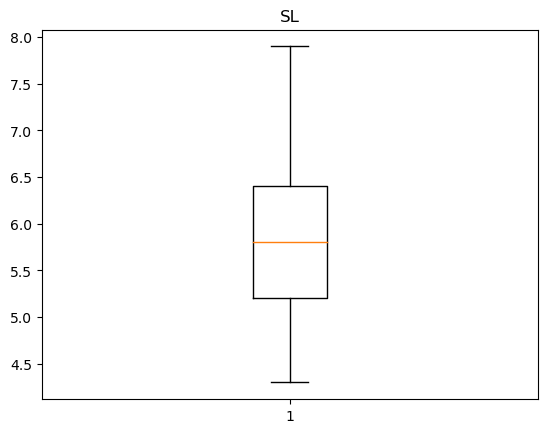

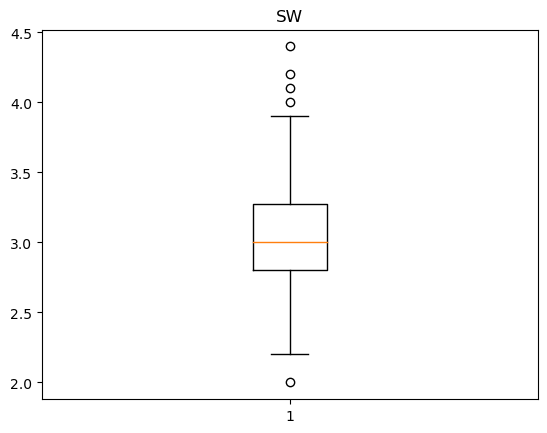

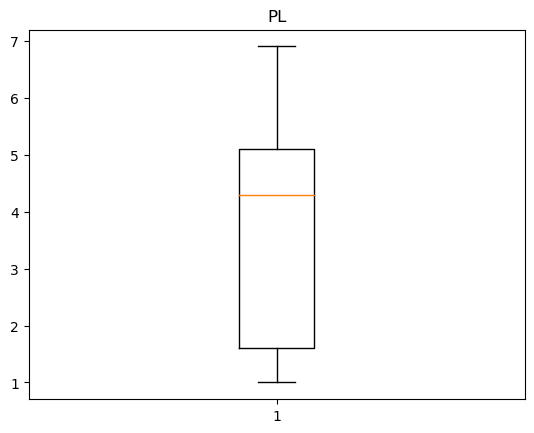

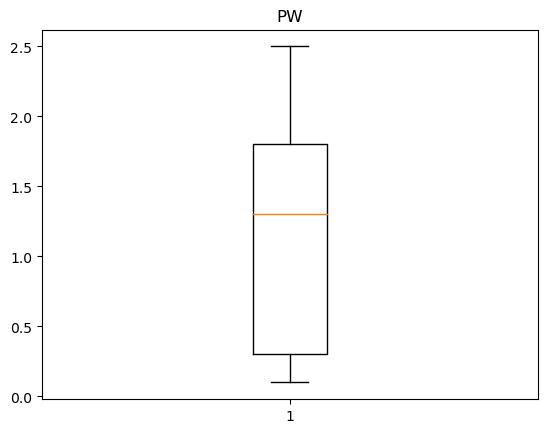

In [10]:
num_col = ['SL','SW','PL','PW']
for x in num_col:
    plt.boxplot(df[x])
    plt.title(x)
    plt.show()
    

In [12]:
# Outlier handling of 'SW' column

Q1 = df['SW'].quantile(0.25)
Q2 = df['SW'].quantile(0.50)
Q3 = df['SW'].quantile(0.75)

print('Q1= ',Q1)
print('Q2= ',Q2)
print('Q3= ',Q3)

IQR = Q3-Q1
print('IQR= ',IQR)

up_lim = Q3+1.5*IQR
low_lim = Q1-1.5*IQR

print('Upper limit= ',up_lim)
print('Lower limit= ',low_lim)

outlier = []
for i in df['SW']:
    if (i<low_lim) or (i>up_lim):
        outlier.append(i)
print('Outlier= ',outlier)

Q1=  2.8
Q2=  3.0
Q3=  3.275
IQR=  0.4750000000000001
Upper limit=  3.9875
Lower limit=  2.0874999999999995
Outlier=  [4.0, 4.4, 4.1, 4.2, 2.0]


In [14]:
df['SW'] = np.where(df['SW'] > up_lim, up_lim, np.where(df['SW'] < low_lim, low_lim, df['SW']))


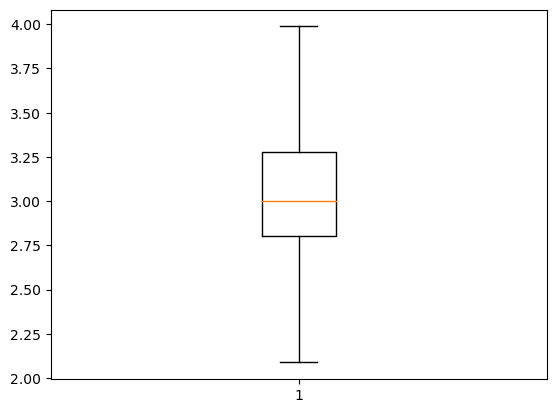

In [15]:
#Boxplot of 'SW' after outlier handling
plt.boxplot(df['SW'])
plt.show()

# Encoding

In [16]:
from sklearn.preprocessing import LabelEncoder


In [17]:
le = LabelEncoder()

In [19]:
df['Classification'] = le.fit_transform(df['Classification'])


In [21]:
df['Classification'].unique()

array([0, 1, 2])

# Classification models


In [22]:
# splitting data to feature and target
x = df.drop(['Classification'],axis=1)
y = df['Classification']

In [23]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)

# 1. Logistic Regression

In [24]:
#Model creation
from sklearn.linear_model import LogisticRegression
logit_model = LogisticRegression()
logit_model.fit(x_train,y_train)

LogisticRegression()

In [25]:
# predictions using test data
y_pred_lr = logit_model.predict(x_test)

In [26]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
print('Accuracy = ',accuracy_score(y_test,y_pred_lr))
print('Precision = ',precision_score(y_test,y_pred_lr,average='macro'))
print('Recall = ',recall_score(y_test,y_pred_lr,average='macro'))
print('f1 score = ',f1_score(y_test,y_pred_lr,average='macro'))
print('Confusion matrix =\n ',confusion_matrix(y_test,y_pred_lr))


Accuracy =  0.9736842105263158
Precision =  0.9722222222222222
Recall =  0.9777777777777779
f1 score =  0.9740129935032483
Confusion matrix =
  [[14  1  0]
 [ 0 11  0]
 [ 0  0 12]]


# 2. kNN

In [30]:
#Choosing k value
from sklearn.neighbors import KNeighborsClassifier
metric = []
neighbors = np.arange(3,15)

for k in neighbors:
    Classifier = KNeighborsClassifier(n_neighbors = k, metric = 'minkowski',p=2)
    Classifier.fit(x_train,y_train)
    y_pred_knn = Classifier.predict(x_test)
    acc = accuracy_score(y_test,y_pred_knn)
    metric.append(acc)


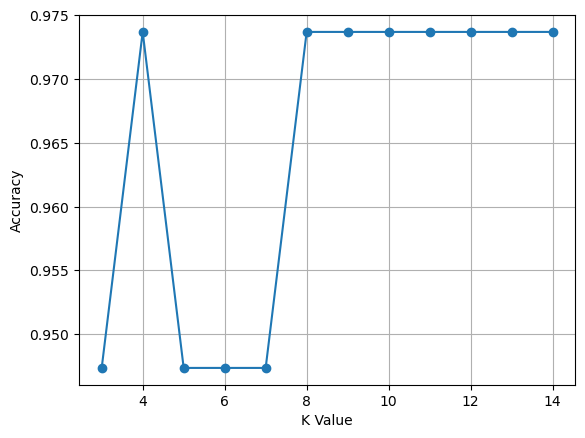

In [31]:
plt.plot(neighbors,metric,'o-')
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.grid()

In [32]:
# Model creation using selected k value
Classifier = KNeighborsClassifier(n_neighbors = 10, metric = 'minkowski',p=2)
Classifier.fit(x_train,y_train)
y_pred_knn = Classifier.predict(x_test)

In [33]:
#Checking the accuracy of the model
print('Accuracy = ',accuracy_score(y_test,y_pred_knn))
print('Precision = ',precision_score(y_test,y_pred_knn,average='macro'))
print('Recall = ',recall_score(y_test,y_pred_knn,average='macro'))
print('f1 score = ',f1_score(y_test,y_pred_knn,average='macro'))
print('Confusion matrix =\n ',confusion_matrix(y_test,y_pred_knn))


Accuracy =  0.9736842105263158
Precision =  0.9722222222222222
Recall =  0.9777777777777779
f1 score =  0.9740129935032483
Confusion matrix =
  [[14  1  0]
 [ 0 11  0]
 [ 0  0 12]]


# 3. SVM Model

In [34]:
#Using linear kernel

from sklearn.svm import SVC
svmclf = SVC(kernel='linear',random_state=42)
svmclf.fit(x_train,y_train)

SVC(kernel='linear', random_state=42)

In [35]:
y_pred_svm=svmclf.predict(x_test)

In [36]:
#Checking the accuracy of the model
print('Accuracy = ',accuracy_score(y_test,y_pred_svm))
print('Precision = ',precision_score(y_test,y_pred_svm,average='macro'))
print('Recall = ',recall_score(y_test,y_pred_svm,average='macro'))
print('f1 score = ',f1_score(y_test,y_pred_svm,average='macro'))
cm = confusion_matrix(y_test,y_pred_svm)
print('Confusion matrix =\n ',cm)

Accuracy =  1.0
Precision =  1.0
Recall =  1.0
f1 score =  1.0
Confusion matrix =
  [[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]


# 4. Decision Tree

In [37]:
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(x_train,y_train)

DecisionTreeClassifier(random_state=42)

In [38]:
y_pred_dt = dt_clf.predict(x_test)

In [39]:
print('Accracy is: ',accuracy_score(y_test,y_pred_dt))
print('Precision = ',precision_score(y_test,y_pred_dt,average='macro'))
print('Recall = ',recall_score(y_test,y_pred_dt,average='macro'))
print('f1 score = ',f1_score(y_test,y_pred_dt,average='macro'))
print('Confusion matrix =\n ',confusion_matrix(y_test,y_pred_dt))

Accracy is:  1.0
Precision =  1.0
Recall =  1.0
f1 score =  1.0
Confusion matrix =
  [[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]


# 5. Random Forest

In [40]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=10,max_depth=20,criterion='entropy',min_samples_split=3)
rf_clf.fit(x_train,y_train)
y_pred_rf = rf_clf.predict(x_test)

In [41]:
print('Accuracy = ',accuracy_score(y_test,y_pred_rf))
print('Precision = ',precision_score(y_test,y_pred_rf,average='macro'))
print('Recall = ',recall_score(y_test,y_pred_rf,average='macro'))
print('f1 score = ',f1_score(y_test,y_pred_rf,average='macro'))
print('Confusion matrix =\n ',confusion_matrix(y_test,y_pred_rf))

Accuracy =  1.0
Precision =  1.0
Recall =  1.0
f1 score =  1.0
Confusion matrix =
  [[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]


# Conclusion

In [43]:
#From above 5 models we can see that Random Forest , Decision Tree & SVM Model gives maximum Accuracy & Precision 
#hence any of these 3 models could be used for classification